# Szimbolikus számítások Pythonban

A szimbolikus számítások/számítógépes algebra területének középpontjában a matematikai kifejezések számítógéppel elvégzett, analitikus manipulációja áll. Ez a megközelítés különbözik a numerikus számítási módszerekétől, ahol lebegőpontos számokkal közelítjük az egyes kifejezések értékét.

A szimbolikus számítások előnye, hogy egzakt eredményekkel szolgál a különböző matematikai problémákra. Míg a numerikus számítások számára korlátot jelent a lebegőpontos számábrázolás maximális pontossága és így azzal mindig csak közelítő eredmény érhető el, addig szimbolikus számítások esetén ez a probléma nem áll fenn. Ennek eléréséhez az egyes adatok valamilyen megfelelő számrendszerben reprezentált számsorozatokat haszálunk.

Ezt ténylegesen megírni úgy, hogy megfelelően is működjön és a számítások emberi idő alatt le is fussanak, nagyon nehéz. Szerencsére viszont a GNU Multiple Precision Arithmetic Library (GMP) libary minden ezzel kapcsolatos nehézséget már megoldott, így a legtöbb szoftver (pl. Mathematica, vagy Maple) manapság már ezt használja.

A szimbolikus számítások elvégzésére képes applikációkat **Computer Algebra System**, vagy röviden **CAS** néven emlegetjük. Ebben a Notebookban egy ilyen CAS, név szerint a `sympy` Python csomagról lesz szó.

## Python -- Sympy

#### 0.1. Telepítés

Akár `pip`-vel, akár `conda`-val telepíthető:

In [1]:
#!pip install sympy -y
!conda install sympy -y

Solving environment: done

# All requested packages already installed.



#### 0.2. Importálás

Kérlek, soha, senki ne használjon egyetlen Python csomagot sem úgy, hogy

```python
from <package_name> import *
```

pl.

```python
from sympy import *
```

Bármikor előfordulhat, hogy két különböző, beimportált csomagban azonos nevű függvények/modulok szerepelnek. Az első `import` hívás ilyenkor behívja az első csomag függvényeit. Amikor az ember egyetlen packaget (pl. `numpy`) használ, akkor a fenti megoldás rendben van, de ez a helyzet nagyon ritka. Jobb hozzászokni a megfelelő importáláshoz minél előbb, hogy már mindig reflexből jöjjön. Pl. ebben a Notebookba összesen 4 csomagot használunk, amiből kettőt csak 1-1 cella és függvény erejéig. A másik kettő (`numpy` és `sympy`) esetén azonban az ilyen fajta importálás már egy halom ütközéshez vezetne.

Pontosan ugyanez a helyzet a `C++` esetén, aminek kapcsán számtalanszor hansúlyozzák, hogy a

```C++
using namespace std;
```

használata egy minden esetben kerülendő gyakorlat. Az ok pontosan ugyanaz, mint a Python esetén. A `C++`-os standard library esetén még súlyosabb is a helyzet egyébként a rengeteg `list`, `sort` és egyéb hasonló, nagyon sok más helyen is előforduló azonosítónév miatt.

Visszatérve a `sympy`-ra, ennek az esetén elég, ha csak a következőek valamelyikét használjuk:

In [2]:
import sympy
#import sympy as sp

### 1. Különbség a szimbolikus és numerikus számítások között

- NumPy -- "Numerikus"
- SymPy -- "Szimbolikus"

#### Numerikus számítás (NumPy-val)

Ebben az esetben lebegőpontos, közelítő értékeket kapunk a megadott matematikai kifejezés értékére.

In [3]:
import numpy as np

In [4]:
print('sqrt(2) =', np.sqrt(2))
print('sqrt(8) =', np.sqrt(8))

sqrt(2) = 1.4142135623730951
sqrt(8) = 2.8284271247461903


#### Szimbolikus számítás (SymPy-val)

Itt már egzakt értékeket kapunk a matematikai kifejetés értékére, nem pedig lebegőpontos közelítéseket.

In [5]:
print('sqrt(2) =', sympy.sqrt(2))
print('sqrt(8) =', sympy.sqrt(8))

sqrt(2) = sqrt(2)
sqrt(8) = 2*sqrt(2)


### 2. `Sympy` bevezető

#### 2.1. Változók definiálása

A fenti egy nagyon egyszerű példa volt, ahol valamilyen egyértelmű formában megadtunk egy jól definiált értékkel rendelkező kifejezést (pl. `sqrt(8)`), melyet egyszerűbb formába írtunk át egy CAS (itt a `sympy`) segítségével. Azonban ennél sokkal komolyabb dologra is képesek vagyunk, méghozzá **szimbolikus változók** definiálására. Ezek segítségével algebrai változókat tartalmazó kifejezéseket is meg tudunk oldani. 

A szimbolikus számítások újdonsága és egyben a fent már tisztázott különbségük a numerikus számításoktól, hogy az egyes változóknak nem lebegőpontos értékeik vannak, hanem ezek úgynevezett érték nélküli *"szimbólumok"*. Ezeket a `sympy`-ban nem-konvencionális módon a számítások ELŐTT kell definiálni. (Hasonlóan, mint kb. bármilyen programozási nyelven, ahol a változókat azelőtt kell definiálni, mielőtt számításokat akarunk velük végezni.) Habár ez tűnik a logikus és "normális" működésnek, a legtöbb CAS (pl. a Mathematica) esetén erre külön nincs szükség. Ezekben a változók a kifejezések számítása közben automatikusan definiálódnak. A `sympy` nem ilyen.

`Sympy` esetén a változók előre definiálása azért szükséges, mert ez egy Python csomag/könyvtár. A "csomag/könyvtár" mágikus kifejezések annyit takarnak csak, hogy ez egy előre megírt függvények tematikus gyűjteménye. Ezek a függvények a `sympy` esetén tisztán Python nyelven lettek megírva, így a Python, mint programozási nyelv szabályai szerint tudnak csak működni. Pythonban nincs deklaráció, az egyes változókat először definiálni kell, hogy azokat létrehozzuk. A `sympy` pedig így ezt a működési sémát követi.

Szimbolikus változókat az alábbi két féle módon definiálhatunk:

In [6]:
# 1. fajta definíció
# A `sympy.Symbol()` használatával
x = sympy.Symbol('x')
y = sympy.Symbol('y')
sqrt_alpha = sympy.Symbol('\\sqrt{(\\alpha)}')

# 2. fajta definíció
# A `sympy.symbols()` használatával
x, y, sqrt_alpha = sympy.symbols('x y \\sqrt{(\\alpha)}')

Az egyenletek bal oldalán egy Python változó található, a jobb oldalon pedig az első 3 sorban egy `sympy.Symbol()`, míg az utolsóban egy `sympy.symbols()` nevű `class`. Ezen két `class` célja pontosan ugyanaz. Az egyetlen különbség, hogy míg a `Symbol` segítségével egyszerre csak egy változó definiálható, addig a `symbols`-val egyszerre bármennyi. Vannak emberek, akik több sorban szeretik a különböző változókat definiálni és vannak olyanok, akik egy sorban le akarják ezt tudni. Igény szerint mindenki kiválaszthatja maga számára a legkényelmesebbet.

Azonban `symbols` használata esetén is, a végső változóknak simán egy `Symbol class` lesz a típusa, pontosan ahogy az a `Symbol` direktben történő használatánál történik.

In [7]:
print('Az `x` változó típusa:\n\t\t', type(x))
print('-'*55)
print('Az `y` változó típusa:\n\t\t', type(y))
print('-'*55)
print('Az `sqrt_alpha` változó típusa:\n\t\t', type(sqrt_alpha))
print('-'*55)

Az `x` változó típusa:
		 <class 'sympy.core.symbol.Symbol'>
-------------------------------------------------------
Az `y` változó típusa:
		 <class 'sympy.core.symbol.Symbol'>
-------------------------------------------------------
Az `sqrt_alpha` változó típusa:
		 <class 'sympy.core.symbol.Symbol'>
-------------------------------------------------------


A szimbolikus változóknak valamilyen "formát"/értéket adunk egy string megadásával a `Symbol`, vagy `symbols` classok argumentumába írva (lásd a változók definiálását tartalmazó cella). Ez a string tartalmazhat akár megfelelő formátumú $\LaTeX$ kódot is.

#### 2.2. Kifejezések renderelése

A Jupyter Notebook, vagy a Jupyter Lab a szimbolikus karakterek, kifejezések, vagy számítási eredmények rendereléséhez a `MathJaX`-ot használja.

Ez az említett "megfelelő formátum" ebben az esetben nem triviális dolog. A konvencionális $\LaTeX$ kóddal ellentétben, ahol minden speciális karakter egyetlen `\`-vel jelölendő, amit közvetlenül a karaktert jelölő azonosítónév követ, itt nem ez a helyzet. Ahogy a fenti cella is mutatja, egyes helyeken dupla `\\` karakter szükséges az azonosítók jelöléséhez. Fontos megjegyezni, hogy ez nem a `sympy` sajátossága, hanem a Jupyter környezet `MathJaX` backendjéé, ami pl. a `sympy` változóit, de más $\LaTeX$-es kifejezéseket is renderel. (Pl. `matplotlib`-es ábrákra írt $\LaTeX$ kód esetén is helyenként `\`, máshol `\\` szükséges a kívánt eredmény eléréséhez.)

In [8]:
display(x, y, sqrt_alpha)

x

y

\sqrt{(\alpha)}

In [9]:
expr = sympy.Integral(sympy.sqrt(1/x), x)
display(expr)

Integral(sqrt(1/x), x)

Terminálban ez konkrétan `Unicode`, vagy régebbi *shellek* esetén `ASCII` karakterek felhasználásával történik:

<img src='img/terminal-render.png'></img>

Ezen kívül $\LaTeX$, MathML és Dot formátumban is lehetséges printelni, ha valaki nagyon akar.

A Dot formátum hasznos lehet, ha valaki egy bonyolult kifejezést akar érthető formában vizualizálni. Ehhez a `graphviz` csomag szükséges, amit telepíthetünk az alábbi módon:

In [10]:
!conda install python-graphviz -y

Solving environment: done

# All requested packages already installed.



In [11]:
import graphviz

Végül egy bonyolult kifejezést dot formátumban konvertálhatunk az `sympy.dotprint` függvénnyel, mely kódot a `graphviz` csomag azonos nevű `graphviz.dotprint` függvényével plottolhatunk.

<span style="color:red">!!!</span>
(Ugye-ugye, hogy nem jó ötlet `from <package> import *`-ot használni, mert itt pont nem tudnánk ezeket a függvényeket meghívni...)
<span style="color:red">!!!</span>

In [12]:
# Egy "bonyolultabb" kifejezés definiálása
expr = sympy.sin(x*y)/2 - x**2 + 1/y

In [13]:
# Ennek Dot formátumú reprezentálását megkaphatjuk az `sympy.dotprint` függvénnyel
print(sympy.dotprint(expr))

digraph{

# Graph style
"ordering"="out"
"rankdir"="TD"

#########
# Nodes #
#########

"Add(Pow(Symbol('y'), Integer(-1)), Mul(Rational(1, 2), sin(Mul(Symbol('x'), Symbol('y')))), Mul(Integer(-1), Pow(Symbol('x'), Integer(2))))_()" ["color"="black", "label"="Add", "shape"="ellipse"];
"Pow(Symbol('y'), Integer(-1))_(0,)" ["color"="black", "label"="Pow", "shape"="ellipse"];
"Symbol('y')_(0, 0)" ["color"="black", "label"="y", "shape"="ellipse"];
"Integer(-1)_(0, 1)" ["color"="black", "label"="-1", "shape"="ellipse"];
"Mul(Rational(1, 2), sin(Mul(Symbol('x'), Symbol('y'))))_(1,)" ["color"="black", "label"="Mul", "shape"="ellipse"];
"Rational(1, 2)_(1, 0)" ["color"="black", "label"="1/2", "shape"="ellipse"];
"sin(Mul(Symbol('x'), Symbol('y')))_(1, 1)" ["color"="black", "label"="sin", "shape"="ellipse"];
"Mul(Symbol('x'), Symbol('y'))_(1, 1, 0)" ["color"="black", "label"="Mul", "shape"="ellipse"];
"Symbol('x')_(1, 1, 0, 0)" ["color"="black", "label"="x", "shape"="ellipse"];
"Symbol('y')_(1,

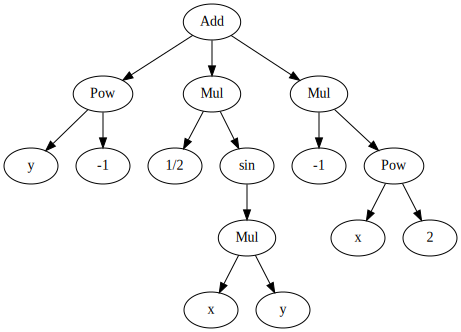

In [14]:
# A graphviz
src = graphviz.Source(sympy.dotprint(expr))

# Ha el akarnánk menteni ezt egy pdf-be
#src.render('output.gv', view=False, cleanup=True)

display(src)

#### 2.3. Különbség a Python változók és a `sympy` szimbolikus változói között

Elsőre nagyon könnyen (legtöbb esetben) megtévesztő lehet egy kezdő számára, hogy konvenció szerint a Python változó nevét (pl. `x`) és az ennek értékül adott `class` argumentumában szereplő konkrét szimbolikus változót jelölő stringet (pl. szintén `'x'`) azonosan jelöljük. Ilyenkor `x` és `'x'` működése és használata könnyen összekeveredhet az ember fejében.

A Python és a `sympy` szimbolikus változói közötti különbség megérthető az alábbi, a `sympy` honlapján is szereplő egyszerű példával:

In [217]:
expr = x + 1
x = 2

Mi az értéke így az `expr` változónak?

1) $x + 1$
2) $3$

In [16]:
display(expr)

x + 1

#### Miért ez az eredmény?

Az első

```python
expr = x + 1
```

sorban `x` még a fentebbi cellában neki értékül adott, `'x'` nevű szimbolikus változót tartalmazó `Symbol class`-val egyenlő. Az `expr`-nek történő értékadással egy `x + 1` értékű, `expr` elnevezésű, szimbolikus változót hozunk létre.

A második

```python
x = 2
```

sorban a Python változó értékét egy `class`-ról egy sima `int`-re változtatjuk. Ennek már utólagosan nincsen semmilyen hatása az előtte már definiált `expr` nevű szimbolikus változóra, ahol az `x` régi értékét használtuk még fel.

### 3. `Sympy` egyszerűsítések

A `sympy` rengeteg függvényt tartalmaz, mely különböző típusú matematikai egyszerűsítések elvégzésére lett tervezve. Ilyen egyszerűsítések pl. a szorzattá alakítás, trigonometrikus függvények kifejezésének egyszerűsítése, stb. A `sympy` ilyen feladatokat elvégző függvényei több csoportba sorolhatóak:

| Polynomial/Rational | Trigonometric | Powers              | Exp/log      | Special (others) |
|:-------------------:|:-------------:|:-------------------:|:------------:|:----------------:|
| `expand`            | `trigsimp`    | `powsimp`           | `expand_log` | $\vdots$         |
| `factor`            | `expand_trig` | `expand_power_exp`  | `logcombine` | $\vdots$         |
| `collect`           |               | `expand_power_base` |              | $\vdots$         |
| `cancel`            |               | `powdenest`         |              | $\vdots$         |
| `apart`             |               |                     |              | $\vdots$         |

Ezek közül mindig érdemes az adott kifejezés számára a legmegfelelőbbet kiválasztani és az alapján továbbhaladni. Ha azonban kellően egyszerű az egyszerűbb formára hozandó kifejezés, amivel dolgunk van, használhatjuk a fentieket összefoglaló `simplify` függvényt is. **Ennek hátránya, hogy minden egyszerűsítési módszert először végigpróbál, majd csak utána választja ki a legmegfelelőbbet.** Emiatt egyes könnyebb esetekben is már aránytalanul lassú lehet, míg bonyolultabb kifejezéseknél ennek a használata kifejezetten nem tanácsos. Emellett már könnyebb esetekben sem feltétlenül azt csinálja, amit az ember triviálisan szeretne, hanem ami neki a legkönnyebb.

In [17]:
x, y, z = sympy.symbols('x y z')

#### 3.1. Példák `simplify`-ra

1. $sin \left( x \right)^{2} + cos \left( x \right)^{2}$

In [18]:
sympy.simplify(sympy.sin(x)**2 + sympy.cos(x)**2)

1

2. $\dfrac{x^{3} + x^{2} - x - 1}{x^{2} + 2 x + 1}$

In [19]:
sympy.simplify((x**3 + x**2 - x - 1) / (x**2 + 2*x + 1))

x - 1

3. $\dfrac{\Gamma \left( x \right)}{\Gamma \left( x - 2 \right)}$

In [20]:
sympy.simplify(sympy.gamma(x) / sympy.gamma(x - 2))

(x - 2)*(x - 1)

#### 3.2. Ellenpélda `simplify`-ra

Szeretnénk a

$$
x^{2} - x - 20
$$

kifejezést szorzattá alakítani... Az eredmény triviálisan

$$
\left( x - 5 \right)
\cdot
\left( x + 4 \right)
$$

Nézzük hogy szuperál ebben a `sympy.simplify()`:

In [21]:
expr = x**2 - x - 20

In [22]:
sympy.simplify(expr)

x**2 - x - 20

Helyette itt most a `sympy.factor()` függvényt érdemes alkalmazni:

In [23]:
sympy.factor(expr)

(x - 5)*(x + 4)

#### 3.3 Rengeteg egyéb függvény

Álljon itt pár példa, amik adnak egy halvány képet arról, hogy hány különböző kifejezéshez találhatóak egyszerűsítést elvégző függvények.

1. Trigonometrikus kifejezés egyszerűsítése

In [24]:
expr = sympy.cosh(x)**2 + sympy.sinh(x)**2
expr

sinh(x)**2 + cosh(x)**2

In [25]:
sympy.trigsimp(expr)

cosh(2*x)

2. Bonyolult(nak kinéző) tört egyszerűsítése

In [26]:
expr = (x*y**2 - 2*x*y*z + x*z**2 + y**2 - 2*y*z + z**2) / (x**2 - 1)
expr

(x*y**2 - 2*x*y*z + x*z**2 + y**2 - 2*y*z + z**2)/(x**2 - 1)

In [27]:
sympy.cancel(expr)

(y**2 - 2*y*z + z**2)/(x - 1)

3. Törtek felbontása

In [28]:
expr = (4*x**3 + 21*x**2 + 10*x + 12) / (x**4 + 5*x**3 + 5*x**2 + 4*x)
expr

(4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x)

In [29]:
sympy.apart(expr)

(2*x - 1)/(x**2 + x + 1) - 1/(x + 4) + 3/x

4. Speciális függvények átalakítása

Amikor egy `A` függvényt értékét egy `B` függvénnyel szeretnénk kifejezni.

In [30]:
expr = sympy.tan(x)
expr

tan(x)

A $\tan \left( x \right)$ átírtható kizárólag $\sin$ függvényekkel kifejezve az alábbi alakra:

In [31]:
expr.rewrite(sympy.sin)

2*sin(x)**2/sin(2*x)

---

In [32]:
expr = sympy.factorial(x)
expr

factorial(x)

In [33]:
expr.rewrite(sympy.gamma)

gamma(x + 1)

### 4. `Sympy` analízis

At előzőeknél lehet, hogy jóval izgalmasabb téma a kalkulus témakörébe tartozó kifejezések megoldása. Ilyen pl. az integrálás, vagy a határérték számítás. 

#### 4.1. Deriválás

Deriválás során a `sympy.deriv()`, vagy a `sympy.Derivative()` függvényeket használjuk. Míg az első azonnal elvégzi a deriválás, addig a második függvény nem, azt csupán egy `sympy.Derivative() class`-á alakítja át.

##### 4.1.1. Egy változó szerinti deriválás

1. $e^{x^{2}}$

In [34]:
expr = sympy.exp(x**2)

In [35]:
sympy.diff(
  expr, # A deriválandó kifejezés
  x     # A változó, ami szerint a deriválást el kell végezzük
)

2*x*exp(x**2)

2. $x^{x}$

In [36]:
expr = sympy.exp(x**x)

In [37]:
sympy.diff(expr, x)

x**x*(log(x) + 1)*exp(x**x)

##### 4.1.2. Magasabb rendű deriváltak

In [38]:
expr = sympy.exp(x**x) / ( x**4 * sympy.sin(x) )

In [39]:
expr

exp(x**x)/(x**4*sin(x))

In [40]:
import matplotlib.pyplot as plt

In [41]:
X = np.linspace(0.8,2.1,100)
Y = np.exp(X**X) / (X**4 * np.sin(X))

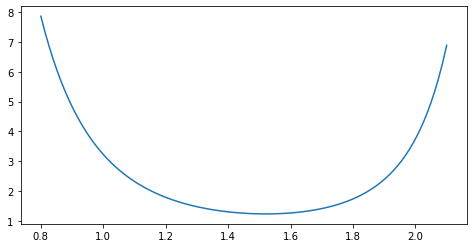

In [42]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(X,Y)
plt.show()

In [43]:
print('Első rend:\n' +
      '-'*15)
display(sympy.diff(expr, x, 1))
print()
print('Második rend:\n' +
      '-'*15)
display(sympy.diff(expr, x, 2))
print()
print('Harmadik rend:\n' +
      '-'*15)
display(sympy.diff(expr, x, 3))
print()
print('Negyedik rend:\n' +
      '-'*15)
display(sympy.diff(expr, x, 4))

Első rend:
---------------


x**x*(log(x) + 1)*exp(x**x)/(x**4*sin(x)) - exp(x**x)*cos(x)/(x**4*sin(x)**2) - 4*exp(x**x)/(x**5*sin(x))


Második rend:
---------------


(-2*x**x*(log(x) + 1)*cos(x)/sin(x) + x**x*(x**x*(log(x) + 1)**2 + (log(x) + 1)**2 + 1/x) + 1 + 2*cos(x)**2/sin(x)**2 - 8*x**x*(log(x) + 1)/x + 8*cos(x)/(x*sin(x)) + 20/x**2)*exp(x**x)/(x**4*sin(x))


Harmadik rend:
---------------


(3*x**x*(1 + 2*cos(x)**2/sin(x)**2)*(log(x) + 1) - 3*x**x*(x**x*(log(x) + 1)**2 + (log(x) + 1)**2 + 1/x)*cos(x)/sin(x) + x**x*(x**(2*x)*(log(x) + 1)**3 + 3*x**x*(log(x) + 1)**3 + (log(x) + 1)**3 + 3*x**x*(log(x) + 1)/x + 3*(log(x) + 1)/x - 1/x**2) - (5 + 6*cos(x)**2/sin(x)**2)*cos(x)/sin(x) + 24*x**x*(log(x) + 1)*cos(x)/(x*sin(x)) - 12*x**x*(x**x*(log(x) + 1)**2 + (log(x) + 1)**2 + 1/x)/x - 12*(1 + 2*cos(x)**2/sin(x)**2)/x + 60*x**x*(log(x) + 1)/x**2 - 60*cos(x)/(x**2*sin(x)) - 120/x**3)*exp(x**x)/(x**4*sin(x))


Negyedik rend:
---------------


(6*x**x*(1 + 2*cos(x)**2/sin(x)**2)*(x**x*(log(x) + 1)**2 + (log(x) + 1)**2 + 1/x) - 4*x**x*(5 + 6*cos(x)**2/sin(x)**2)*(log(x) + 1)*cos(x)/sin(x) - 4*x**x*(x**(2*x)*(log(x) + 1)**3 + 3*x**x*(log(x) + 1)**3 + (log(x) + 1)**3 + 3*x**x*(log(x) + 1)/x + 3*(log(x) + 1)/x - 1/x**2)*cos(x)/sin(x) + x**x*(x**(3*x)*(log(x) + 1)**4 + 6*x**(2*x)*(log(x) + 1)**4 + 7*x**x*(log(x) + 1)**4 + (log(x) + 1)**4 + 6*x**(2*x)*(log(x) + 1)**2/x + 18*x**x*(log(x) + 1)**2/x + 6*(log(x) + 1)**2/x - 4*x**x*(log(x) + 1)/x**2 + 3*x**x/x**2 - 4*(log(x) + 1)/x**2 + 3/x**2 + 2/x**3) + 5 + 28*cos(x)**2/sin(x)**2 + 24*cos(x)**4/sin(x)**4 - 48*x**x*(1 + 2*cos(x)**2/sin(x)**2)*(log(x) + 1)/x + 48*x**x*(x**x*(log(x) + 1)**2 + (log(x) + 1)**2 + 1/x)*cos(x)/(x*sin(x)) - 16*x**x*(x**(2*x)*(log(x) + 1)**3 + 3*x**x*(log(x) + 1)**3 + (log(x) + 1)**3 + 3*x**x*(log(x) + 1)/x + 3*(log(x) + 1)/x - 1/x**2)/x + 16*(5 + 6*cos(x)**2/sin(x)**2)*cos(x)/(x*sin(x)) - 240*x**x*(log(x) + 1)*cos(x)/(x**2*sin(x)) + 120*x**x*(x**x*(log(x) + 1

##### 4.1.3. Több változó szerinti deriválás

In [44]:
expr = sympy.exp(x*y*z)

In [45]:
sympy.diff(expr, x, 2, y, 3, z, 1)

x*z**2*(x**3*y**3*z**3 + 11*x**2*y**2*z**2 + 30*x*y*z + 18)*exp(x*y*z)

##### 4.1.4. Nem elvégzett deriválás

In [46]:
deriv = sympy.Derivative(expr, x, 2, y, 3, z, 1)

In [47]:
deriv

Derivative(exp(x*y*z), (x, 2), (y, 3), z)

In [48]:
print('Type of derivative expression:\n\t\t', type(deriv))
print('-'*55)

Type of derivative expression:
		 <class 'sympy.core.function.Derivative'>
-------------------------------------------------------


In [49]:
deriv.doit()

x*z**2*(x**3*y**3*z**3 + 11*x**2*y**2*z**2 + 30*x*y*z + 18)*exp(x*y*z)

#### 4.2. Integrálás

Itt kizárólag a `sympy.integrate()` függvényt tudjuk szimbolikus integrálásra használni. Ez bőven elég, hisz ezt mind határozott, mind határozatlan integrálok esetén is használhatjuk, valamint a speciális függvényekkel is elbánik. Hasonlóan a deriváláshoz, az `integrate()` függvény is képes több változós egyenleteket kezeni.

##### 4.2.1. Határozatlan integrálok

In [50]:
expr = sympy.tan(x)**(2)

In [51]:
expr

tan(x)**2

In [52]:
sympy.integrate(expr, x)

-x + sin(x)/cos(x)

---

In [53]:
expr = sympy.tan(x)**(2) * sympy.sin(x)

In [54]:
expr

sin(x)*tan(x)**2

In [55]:
sympy.integrate(expr, x)

cos(x) + 1/cos(x)

---

In [56]:
expr = sympy.sqrt(sympy.tan(x))

In [57]:
expr

sqrt(tan(x))

In [58]:
sympy.integrate(expr, x)

Integral(sqrt(tan(x)), x)

Ezzel már nem bánik el a `sympy` sem...

##### 4.2.2. Határozott integrálok

In [59]:
expr = sympy.sin(x)

In [60]:
expr

sin(x)

In [61]:
sympy.integrate(
  expr,           # Az integrálandó kifejezés
  (x, 0, sympy.pi)   # Az integrálási változó és a hozzá tartozó integrálási határok
)

2

In [62]:
sympy.integrate(
  expr,             # Az integrálandó kifejezés
  (x, 0, 2*sympy.pi)   # Az integrálási változó és a hozzá tartozó integrálási határok
)

0

---

In [63]:
expr = sympy.exp(-x**2 - y**2)

In [64]:
expr

exp(-x**2 - y**2)

In [65]:
# A végtelent a `sympy` az 'oo' azonosítóval (két darab kis "O" betű) jelöli  
inf = sympy.oo

# Végtelen integrálási határokat ezzel könnyen deiniálhatunk
lim_x = (x, -inf, inf) # Az `x` változó határait
lim_y = (y, -inf, inf) # Az `y` változó határait

In [66]:
sympy.integrate(expr, lim_x, lim_y)

pi

##### 4.2.3. Nem elvégzett integrálás

Hasonlóan a deriválásnál látott `sympy.Derivate() class`hoz, az integrálás esetén is létezik egy ezzel analóg `class`, az `sympy.Integral`.

In [67]:
integ = sympy.Integral(sympy.log(x)**2, x)

In [68]:
integ

Integral(log(x)**2, x)

In [69]:
print('Type of integrate expression:\n\t\t', type(integ))
print('-'*55)

Type of integrate expression:
		 <class 'sympy.integrals.integrals.Integral'>
-------------------------------------------------------


In [70]:
integ.doit()

x*log(x)**2 - 2*x*log(x) + 2*x

#### 4.3. Határérték számítás

##### 4.3.1. A kisbetűs `sympy.limit() class`

In [71]:
expr = sympy.sin(x)/x

In [72]:
expr

sin(x)/x

In [73]:
sympy.limit(expr, x, 0)

1

In [74]:
sympy.limit(expr, x, inf)

0

##### 4.3.2. A nagybetűs `sympy.Limit() class`

In [75]:
limit = sympy.Limit(expr, x, 0)

In [76]:
limit

Limit(sin(x)/x, x, 0)

In [77]:
print('Type of limit expression:\n\t\t', type(limit))
print('-'*55)

Type of limit expression:
		 <class 'sympy.series.limits.Limit'>
-------------------------------------------------------


In [78]:
limit.doit()

1

##### 4.3.3. Alulról-felülről közelítés

In [79]:
limit_pos = sympy.Limit(1/x, x, 0, '+')
limit_neg = sympy.Limit(1/x, x, 0, '-')

In [80]:
display(limit_pos)
display(limit_neg)

Limit(1/x, x, 0)

Limit(1/x, x, 0, dir='-')

In [81]:
print('Pozitív irányból közelítve:\n' +
      '-'*30)
display(limit_pos.doit())
print()
print('Negatív irányból közelítve:\n' +
      '-'*30)
display(limit_neg.doit())

Pozitív irányból közelítve:
------------------------------


oo


Negatív irányból közelítve:
------------------------------


-oo

#### 4.4. Taylor-sorba fejtés

In [82]:
expr = sympy.exp(x)

In [83]:
expr

exp(x)

In [84]:
expr.series(x, x0=0, n=6)

1 + x + x**2/2 + x**3/6 + x**4/24 + x**5/120 + O(x**6)

In [85]:
expr.series(x, x0=0, n=6).removeO()

x**5/120 + x**4/24 + x**3/6 + x**2/2 + x + 1

### 5. `Sympy` egyenletek megoldása

`Sympy`-ban minden egyenlet az alábbi `class` formájában tárolódik:

In [86]:
sympy.Eq(
  x, # Az egyenlet bal oldala
  y  # Az egyenlet jobb oldala
)

Eq(x, y)

#### 5.1. Sima egyenletek

##### `sympy.solveset()`

Ez a függvény a legáltalánosabb egyenletmegoldó függvény, mely az egyenlet megoldásainak halmazával tér vissza (erre utal a nevében a `set` szó). Ennek szerepe hasonló az egyszerűsítéseknél említett `sympy.simplify()` függvényhez, mely az egyszerűsítések esetén volt "általánosan, mindenre használható, mindent tartalmazó" függvény.

In [88]:
eq = sympy.Eq(x**2, 1)
eq

Eq(x**2, 1)

In [89]:
sympy.solveset(eq)

FiniteSet(-1, 1)

In [229]:
eq = sympy.Eq(x**3, 1)
eq

Eq(x**3, 1)

In [230]:
sympy.solveset(eq)

FiniteSet(1, -1/2 - sqrt(3)*I/2, -1/2 + sqrt(3)*I/2)

Ha az egyenletnek nincs megoldása, akkor érthetően az üres halmazzal tér vissza:

In [90]:
eq = sympy.Eq(sympy.exp(x), 0)
eq

False

In [91]:
sympy.solveset(eq)

EmptySet

#### 5.2. Egyenletrendszerek

##### 5.2.1. `sympy.linsolve()`

A `sympy.linsolve()` függvény a lineáris egyenletrendszerek megoldására alkalmaható `sympy` függvény. 

In [92]:
eqs = [
  sympy.Eq(x - y +   z + 5, 0),
  sympy.Eq(x + y - 2*z - 2, 0)
]

display(eqs[0])
display(eqs[1])

Eq(x - y + z + 5, 0)

Eq(x + y - 2*z - 2, 0)

In [93]:
sympy.linsolve(eqs, (x, y, z))

FiniteSet((z/2 - 3/2, 3*z/2 + 7/2, z))

Az egyes elemek sorrendben a megadott változók (itt $x$, $y$ és $z$) lehetséges értékeit jelölik. A fenti egyenltben $z$ láthatóan tetszőleges értéket felvehet.

##### 5.2.2 Többféle módon definiálható egyenletrendszerek

In [113]:
# 1. módszer (sympy egyenletek)
eqs = [
  sympy.Eq(x + y +   z - 1, 0),
  sympy.Eq(x + y + 2*z - 3, 0)
]

# Ez "lerövidíthető" az alábbi, fentivel ekvivalens formára
eqs = [
  x + y +   z - 1,
  x + y + 2*z - 3
]

display(eqs[0])
display(eqs[1])

x + y + z - 1

x + y + 2*z - 3

In [114]:
sympy.linsolve(eqs, (x, y, z))

FiniteSet((-y - 1, y, 2))

---

In [96]:
# 2. módszer  (mátrix reprezentáció)
eqs = sympy.Matrix((
  [1, 1, 1, 1],
  [1, 1, 2, 3]
))

In [97]:
sympy.linsolve(eqs, (x, y, z))

FiniteSet((-y - 1, y, 2))

Mátrix formátumban történő megadásnál fontos figyelni az előjelekre! Mivel a fenti egyenletekben a $-1$ és $-3$ konstansok szerepeltek, így könnyen gondolhatnánk, hogy az itteni reprezentációban is a $-1$ és $-3$ értékeket kell írjuk a `sympy.Matrix()`-nak megadott listák (melyek a két egyenletet jelölik) utolsó elemébe. Ez azonban láthatóan nem így van.

Ennek az oka, hogy míg a fenti reprezentációban pl. az első egyenlet esetén a

```python
sympy.Eq(x + y + z - 1, 0)
```

`sympy` egyenletet definiáltuk, addig mátrix reprezentáció során a `sympy.Matrix()` és a `sympy.linsolve()` szerencsétlen kölcsönhatása miatt mindig a

```python
sympy.Eq(x + y + z, 1)
```

formában szükséges gondolkodni. A konstans emiatt érthetően minden esetben előjelet vált, ahogy az ebben a cellában bemutatott két egyenlet esetén is látszik. Míg a `sympy` a legtöbb helyen megfelelően figyel és igyekszik konzisztens lenni, úgy ebben a dologban (feltehetően valamelyik függvény egyébként gördülékeny működését biztosítandó) ez sajnos nem így van.

In [98]:
# Még egy 3. módszer is létezik... :) Ami indokolatlanul bonyolult és felesleges.
# De aki erre kíváncsi, megtalálja az alábbi címen:
# https://docs.sympy.org/latest/tutorial/solvers.html 

##### 5.2.3. `sympy.nonlinsolve()`

Pl. itt egy tisztán képzetes megoldásokkal rendelkező egyenletrendszer:

In [99]:
eqs = [
  x**2 + 1,
  y**2 + 1
]

display(eqs[0])
display(eqs[1])

x**2 + 1

y**2 + 1

In [100]:
sympy.nonlinsolve(eqs, [x, y])

FiniteSet((I, I), (-I, I), (I, -I), (-I, -I))

---

Itt egy másik egyenletrendszer, aminek végtelenül sok megoldása van. Míg $x=0$, addig $y$ bármilyen értéket felvehet:

In [101]:
eqs = [
  x*y,
  x*y - x
]

display(eqs[0])
display(eqs[1])

x*y

x*y - x

In [102]:
sympy.nonlinsolve(eqs, [x, y])

FiniteSet((0, y))

Sajnos a `sympy.nonlinsolve()` sem képes mindent megoldani. Vannak olyan bonyolultabb esetek, vagy egyenletrendszer típusok, amiknél (a fejlesztés jelenlegi stádiumában még) elhasal...

#### 5.3. Diffegyenletek

In [103]:
# Definiáljunk egy szimbolikus függvényt! (Ilyet is lehet)
f = sympy.Function('f')

In [104]:
# Definiáljunk az egyenlet két oldalán levő tagokat
# (left-hand side; right-hand side)
lh_side = f(x).diff(x, x) - 2*f(x).diff(x) + f(x)
rh_side = sympy.sin(x)

In [105]:
diffeq = sympy.Eq(lh_side, rh_side)
diffeq

Eq(f(x) - 2*Derivative(f(x), x) + Derivative(f(x), (x, 2)), sin(x))

In [106]:
sympy.dsolve(
  diffeq, # A megoldandó egyenlet
  f(x)    # Milyen szimbólumra/változóra oldjuk meg
)

Eq(f(x), (C1 + C2*x)*exp(x) + cos(x)/2)

### 6. `Sympy` mátrixok

Ezekről külön nem ejtenék szót. A rendelkezésre álló módszerek és még maguk a függvényhívások nevei is megegyeznek a `numpy`-ból ismertekkel. A különbséget itt tényleg csak a numerikus/szimbolikus számítási módszer jelenti.

Részletesebben: https://docs.sympy.org/latest/tutorial/matrices.html

## +1. HF

1. Telepítsétek a `sympy`-t.
2. Valami teljesen tetszőlegesen választott `sympy` függvény használatával próbáljátok ki, hogy tényleg működik-e telepítés után a `sympy`?
3. A fizikában rengeteg olyan dolog van, amit szokás sorbafejteni, általában 2. rendig. Keressetek egy olyan függvényt, aminek tipikusan a sorbafejtett alakját szokás használni a fizikában és fejtsétek sorba a `sympy` segítségével 2. (vagy valamelyik) rendig. (Pro tippek: 1. A gravitációval bármilyen formában kapcsolatos jelenségek/mennyiségek/egyenletek esetén egy csomó ilyen van. 2. Ezeket kb. soha nem 0 körül kell sorba fejteni, hanem mondjuk valami paraméternek vett $h$ magasság, vagy $l$ távolság, vagy ilyesmi körül.)
4. A kapott eredményt adjátok át egy Python változónak és deriváljátok le, majd printeljétek ki az eredményt.
5. Ha ez valami kezelhető értékekkel rendelkező függvény, akkor ábrázoljtok is egy `matplotlib` ábrán.

6. Küldjétek be a Notebookot/Python scriptet/macis borítékba csomagolt kézzel írt kódot
- az alábbi időpontig: 2021.10.12. 23:59:59 (CEST)
- az alábbi címre: masterdesky [kukac] protonmail.com

(és légyszi írjátok le a neveteket is a levélbe, csak hogy tudjam, melyik, kitől jön)